In [42]:
#syed shahzaib 01-134212-178
#dip lab BSCS 7B

import cv2
import matplotlib.pyplot as plt 

In [5]:
image = cv2.imread('kit.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

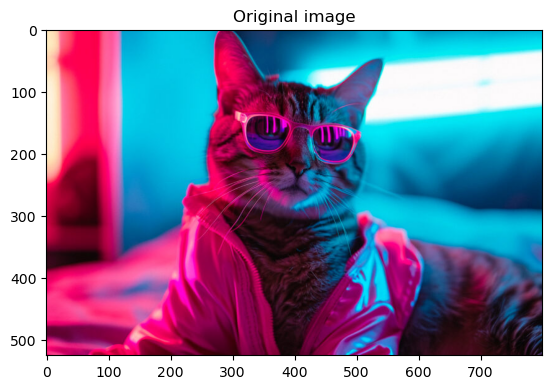

In [7]:
plt.imshow(image)
plt.title('Original image')
plt.show()

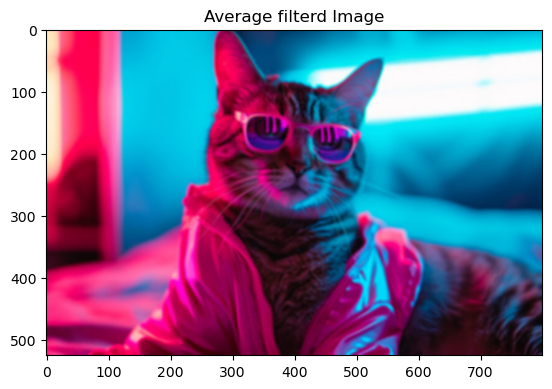

In [9]:
average_filtered = cv2.blur(image, (5,5))
plt.imshow(average_filtered)
plt.title('Average filterd Image')
plt.show()

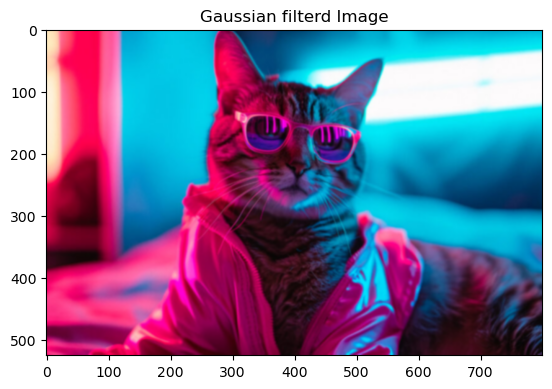

In [11]:
gaussian_filtered = cv2.GaussianBlur(image, (5,5),0)

plt.imshow(gaussian_filtered)
plt.title('Gaussian filterd Image')
plt.show()

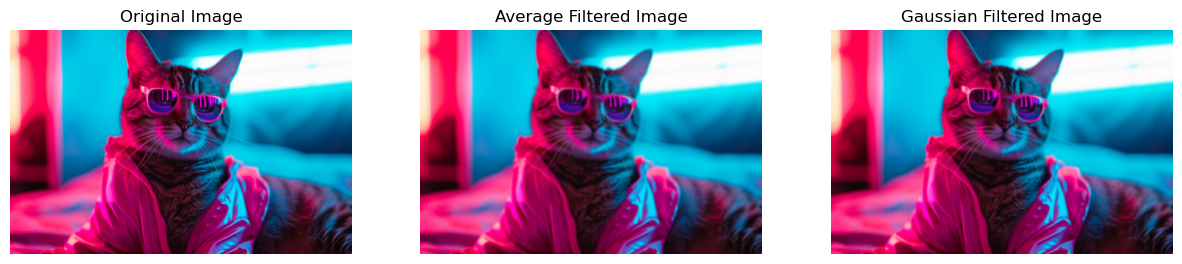

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[1].imshow(average_filtered)
axes[1].set_title('Average Filtered Image')
axes[2].imshow(gaussian_filtered)
axes[2].set_title('Gaussian Filtered Image')
for ax in axes:
    ax.axis('off')
plt.show()


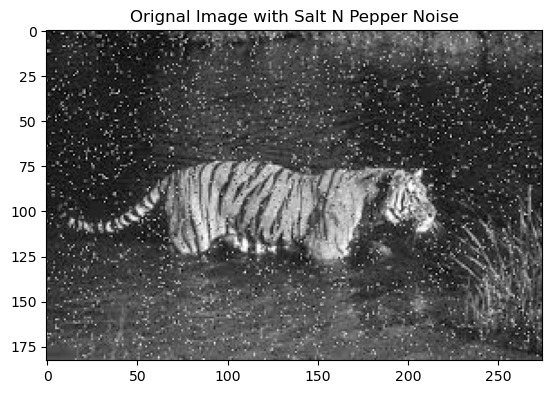

In [18]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

image = cv2.imread('imageSNP.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='grey')
plt.title('Orignal Image with Salt N Pepper Noise')
plt.show()


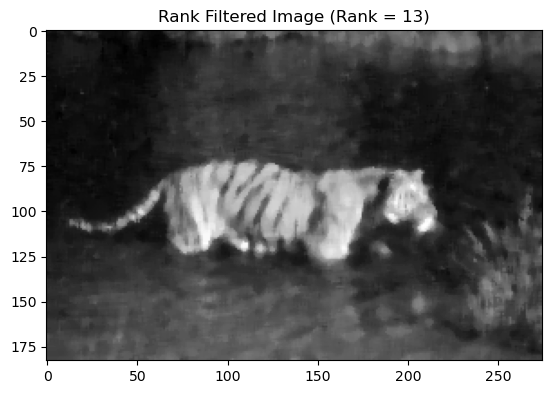

In [20]:
from scipy.ndimage import rank_filter

rank_filtered = rank_filter(image, rank=13, size=(5, 5))

plt.imshow(rank_filtered, cmap='gray')
plt.title('Rank Filtered Image (Rank = 13)')
plt.show()


In [22]:
#Median Filter (Rank = 13): Effectively reduces salt and pepper noise by selecting the median pixel value in the neighborhood.

#Minimum Filter (Rank = 1): Increases noise by emphasizing darker pixels (salt noise).

#Maximum Filter (Rank = 25): Increases noise by emphasizing brighter pixels (pepper noise).

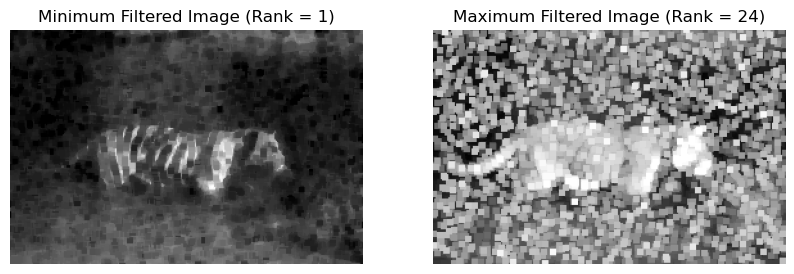

In [28]:
min_filtered = rank_filter(image, rank=1, size=(5, 5))
max_filtered = rank_filter(image, rank=24, size=(5, 5))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(min_filtered, cmap='gray')
axes[0].set_title('Minimum Filtered Image (Rank = 1)')
axes[1].imshow(max_filtered, cmap='gray')
axes[1].set_title('Maximum Filtered Image (Rank = 24)')
for ax in axes:
    ax.axis('off')
plt.show()


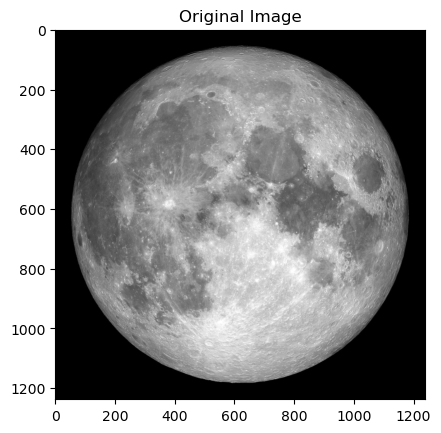

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('moon.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()


C:\Users\Nana\AppData\Local\Temp\ipykernel_18696\342567186.py:10: RuntimeWarning: overflow encountered in scalar add
  horizontal_edge = image[i, j+1] + image[i, j-1] - 2 * image[i, j]
C:\Users\Nana\AppData\Local\Temp\ipykernel_18696\342567186.py:9: RuntimeWarning: overflow encountered in scalar add
  vertical_edge = image[i+1, j] + image[i-1, j] - 2 * image[i, j]


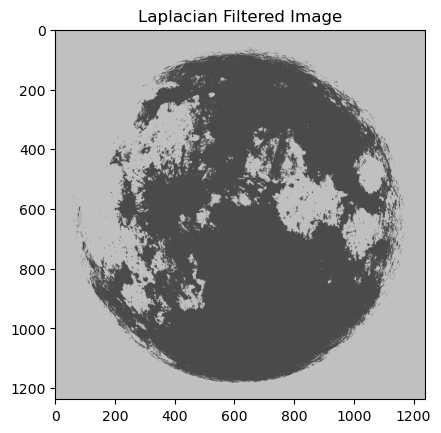

In [36]:
def mylaplacian(image):
    
    rows, cols = image.shape
    
    laplacian_image = np.zeros((rows, cols), dtype=np.float32)
    
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            vertical_edge = image[i+1, j] + image[i-1, j] - 2 * image[i, j]
            horizontal_edge = image[i, j+1] + image[i, j-1] - 2 * image[i, j]
            laplacian_image[i, j] = vertical_edge + horizontal_edge
    laplacian_image = cv2.normalize(laplacian_image, None, 0, 255, cv2.NORM_MINMAX)
    return laplacian_image


laplacian_result = mylaplacian(image)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Laplacian Filtered Image')
plt.show()

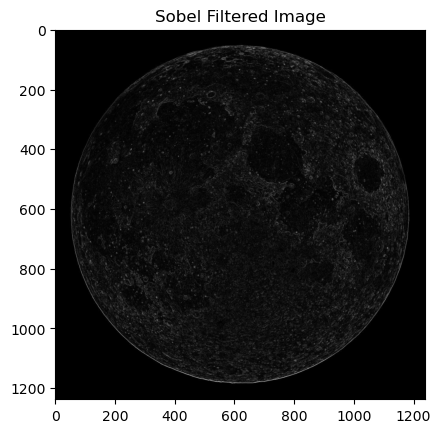

In [38]:
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_result = cv2.magnitude(sobel_x, sobel_y)

sobel_result = cv2.normalize(sobel_result, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filtered Image')
plt.show()
